**FRETlines Usage Example**

**Import statements**

First, we import the `static_FRET_lines` and `dynamic_FRET_line` functions from the FRETlines library. We will also require the different distance distribution models in `distance_distributions`.
We will also require *matplotlib* for plotting.

In [18]:
from FRETlines import static_FRET_line, dynamic_FRET_line
from FRETlines import distance_distributions as dist
import numpy as np

from ipywidgets import *
from matplotlib import pyplot as plt

%matplotlib notebook

plt.rcParams['figure.dpi'] = 100

**Distance distributions**

Traditionally, a normal distribution has been assumed for the inter-dye distance of flexibly-coupled dyes. In the paper, we outline that instead the inter-dye distance follows a $\chi$ distribution with three degrees of freedom.

The following plot allows to interactively explore the difference between the two distributions as a function of the mean inter-dye distance and width of the distribution.

For large distances and small widths ($R >> \sigma$), the distributions are identical. They deviate if the width becomes comparable to the distances.

In [17]:
xR = np.linspace(0,200,1000)
p_norm = dist.normal_distribution(xR, 50, 5)
p_chi = dist.chi_distribution(xR, 50, 5)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_norm, = ax.plot(xR,p_norm)
line_chi, = ax.plot(xR,p_chi)
plt.xlim([0,100])
plt.xlabel('Distance [Å]')
plt.ylabel('Probability')
plt.legend(('Normal distribution','$\chi$ distribution'))

def update(width=10., distance=15.):
    ydata_norm = dist.normal_distribution(xR, distance, width)
    ydata_chi = dist.chi_distribution(xR, distance, width)
    line_norm.set_ydata(ydata_norm)
    line_chi.set_ydata(ydata_chi)
    plt.ylim([0,np.max((np.max(ydata_norm),np.max(ydata_chi)))*1.05])
    fig.canvas.draw()

interact(update, width=(1,30,1), distance=(1,80,1));

<IPython.core.display.Javascript object>

**Polymer models**

For polymer models, we have discussed the random coil (or Gaussian chain), defined by the root-mean-square end-to-end distance, and the worm-like chain, defined by the length and stiffness $\kappa$. The stiffness is defined as the ratio of the persistence length to the total chain length.

The following plot allows to interactively explore the depende of the inter-dye distance distribution on the length and stiffness of the polymer chain.

<IPython.core.display.Javascript object>


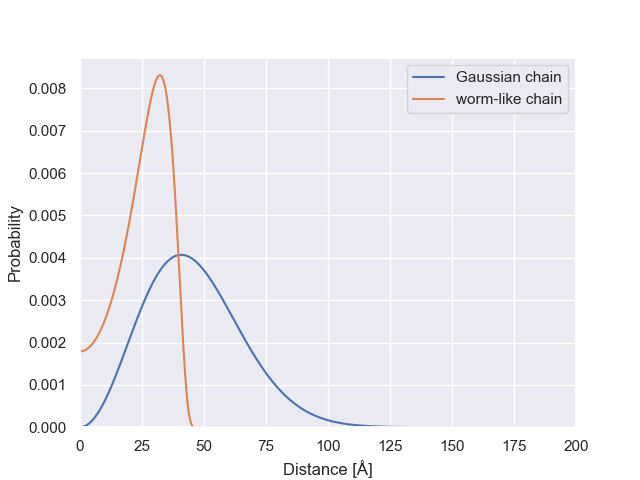

interactive(children=(IntSlider(value=50, description='length', max=150, min=10, step=5), FloatSlider(value=0.…

In [3]:
p_GC = dist.gaussian_chain(xR,50)
p_WLC = dist.worm_like_chain(xR,50,0.5)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_GC, = ax.plot(xR,p_GC)
line_WLC, = ax.plot(xR,p_WLC)
plt.xlim([0,200])
plt.xlabel('Distance [Å]')
plt.ylabel('Probability')
plt.legend(('Gaussian chain','worm-like chain'))
def update(length=50., stiffness=0.5):
    ydata_GC = dist.gaussian_chain(xR, length)
    ydata_WLC = dist.worm_like_chain(xR, length, stiffness)
    line_GC.set_ydata(ydata_GC)
    line_WLC.set_ydata(ydata_WLC)
    plt.ylim([0,np.max((np.max(ydata_GC),np.max(ydata_WLC)))*1.05])
    fig.canvas.draw()

interact(update, length=(10,150,5), stiffness=(0.05,1,0.05));

**static FRET-lines**

The width of the inter-dye distance distribution has large effect on the shape of the static FRET-line, especially at high FRET efficiency.

The following plot allows to interactively explore the effect of the distribution width on the shape of the static FRET-line.

<IPython.core.display.Javascript object>


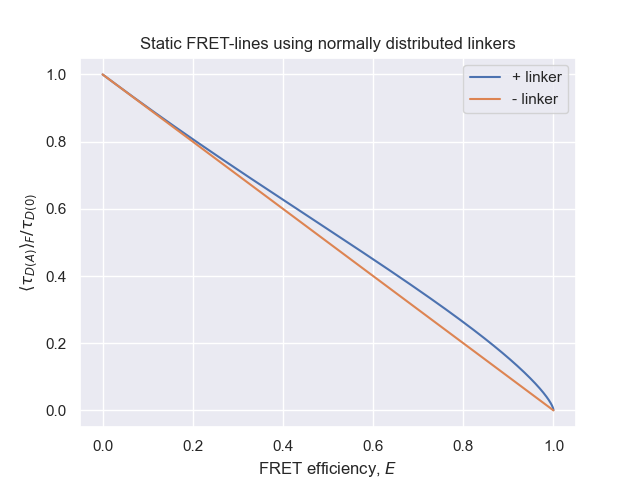

interactive(children=(FloatSlider(value=5.0, description='width', max=50.0, min=1.0, step=1.0), Output()), _do…

In [4]:
# Interactively
E, tau = static_FRET_line(variable_parameter=0,param=(50,5),param_range=(1,200))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(E,tau)
ax.plot((0,1),(1,0))
plt.legend(('+ linker','- linker'))
plt.xlabel('FRET efficiency, $E$')
plt.ylabel('$\\left<\\tau_{D(A)}\\right>_F/\\tau_{D(0)}$')
plt.title('Static FRET-lines using normally distributed linkers')

def update(width=5.):
    E,tau = static_FRET_line(variable_parameter=0,param=(50,width),param_range=(1,200))
    line.set_xdata(E)
    line.set_ydata(tau)
    fig.canvas.draw()

interact(update, width=(1.,50.,1.));

The same plot can be generated in the moment representation:

<IPython.core.display.Javascript object>


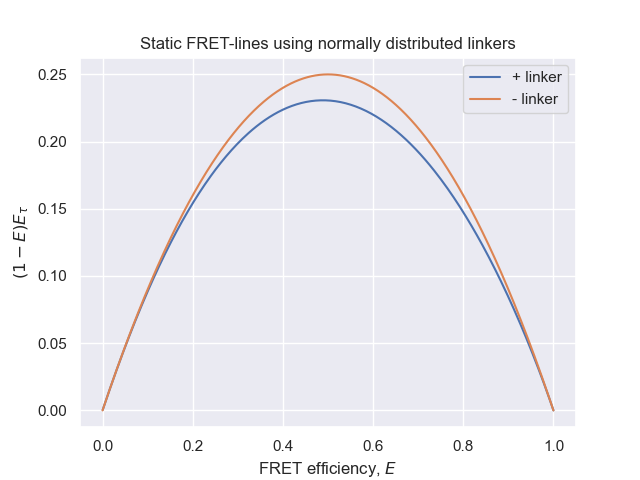

interactive(children=(FloatSlider(value=5.0, description='width', max=50.0, min=1.0, step=1.0), Output()), _do…

In [11]:
# Interactively
E, tau = static_FRET_line(variable_parameter=0,param=(50,5),param_range=(1,200),mode='moments')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(E,tau)
x = np.linspace(0,1,1000)
ax.plot(x,x*(1-x))
plt.legend(('+ linker','- linker'))
plt.xlabel('FRET efficiency, $E$')
plt.ylabel('$(1-E)E_{\\tau}$')
plt.title('Static FRET-lines using normally distributed linkers')

def update(width=5.):
    E,tau = static_FRET_line(variable_parameter=0,param=(50,width),param_range=(1,200),mode='moments')
    line.set_xdata(E)
    line.set_ydata(tau)
    fig.canvas.draw()

interact(update, width=(1.,50.,1.));

**Static FRET-lines for different distribution models**

The following plot allows to compare the static FRET-lines for normal and chi distributions as a function of the distribution width. Deviations are observed only at large distribution widths $\sigma > 10$ Å.

<IPython.core.display.Javascript object>


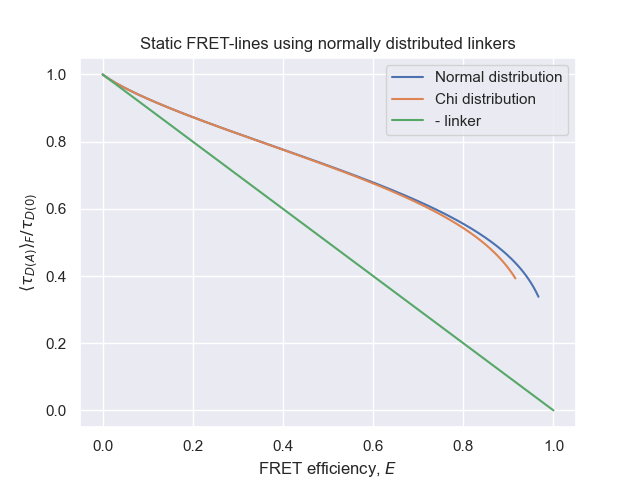

interactive(children=(FloatSlider(value=20.0, description='width', max=50.0, min=1.0, step=1.0), Output()), _d…

In [6]:
# Interactively
E_norm, tau_norm = static_FRET_line(variable_parameter=0,param=(50,20),param_range=(1,200))
E_chi, tau_chi = static_FRET_line(model=dist.chi_distribution, variable_parameter=0,param=(50,20),param_range=(1,200))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_norm, = ax.plot(E_norm,tau_norm)
line_chi, = ax.plot(E_chi,tau_chi)
ax.plot((0,1),(1,0))
plt.legend(('Normal distribution','Chi distribution','- linker'))
plt.xlabel('FRET efficiency, $E$')
plt.ylabel('$\\left<\\tau_{D(A)}\\right>_F/\\tau_{D(0)}$')
plt.title('Static FRET-lines using normally distributed linkers')

def update(width=20.):
    E_norm,tau_norm = static_FRET_line(variable_parameter=0,param=(50,width),param_range=(1,200))
    E_chi, tau_chi = static_FRET_line(model=dist.chi_distribution, variable_parameter=0,param=(50,width),param_range=(1,200))

    line_norm.set_xdata(E_norm)
    line_norm.set_ydata(tau_norm)
    line_chi.set_xdata(E_chi)
    line_chi.set_ydata(tau_chi)
    
    fig.canvas.draw()

interact(update, width=(1.,50.,1.));

**FRET-lines for polymer models**

For the random coil (or Gaussian chain) model, only a single FRET-line can be constructed, obtained by varying the root-mean-square end-to-end distance. For the worm-like chain mode, we can construct FRET-lines at constant stiffness &kappa; and variable chain length *L*, or at constant chain length and variable stiffness.

The following plot allows to investigate the behavior of the static FRET-line for the worm-like chain of varying length as a function of the stiffness $\kappa$.

<IPython.core.display.Javascript object>


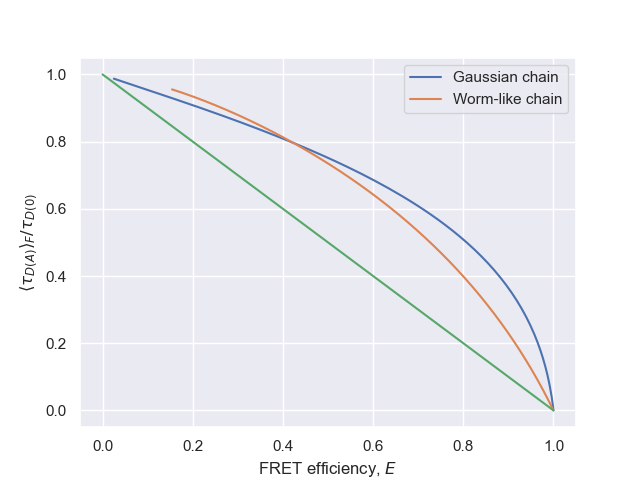

interactive(children=(FloatSlider(value=0.5, description='stiffness', max=1.0, min=0.05, step=0.05), Output())…

In [7]:
# Interactively
E_GC, tau_GC = static_FRET_line(model=dist.gaussian_chain,param_range=(1,1000))
E_WLC, tau_WLC = static_FRET_line(model=dist.worm_like_chain,variable_parameter=0,param=(50,0.5),param_range=(20,200))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_GC, = ax.plot(E_GC,tau_GC)
line_WLC, = ax.plot(E_WLC,tau_WLC)            
ax.plot((0,1),(1,0))
plt.legend(('Gaussian chain','Worm-like chain'))
plt.xlabel('FRET efficiency, $E$')
plt.ylabel('$\\left<\\tau_{D(A)}\\right>_F/\\tau_{D(0)}$')

def update(stiffness=0.5):
    E_WLC, tau_WLC = static_FRET_line(model=dist.worm_like_chain,variable_parameter=0,param=(100,stiffness),param_range=(20,200))

    line_WLC.set_xdata(E_WLC)
    line_WLC.set_ydata(tau_WLC)
    
    fig.canvas.draw()

interact(update, stiffness=(0.05,1.,0.05));

**Dynamic FRET-lines**

Dynamic FRET-lines are constructed between different points of static FRET-lines and describe the mixing between the two connected species.
The following plot allows to interactively explore the dynamic FRET-line for a Gaussian distance distribution of variable width.

<IPython.core.display.Javascript object>


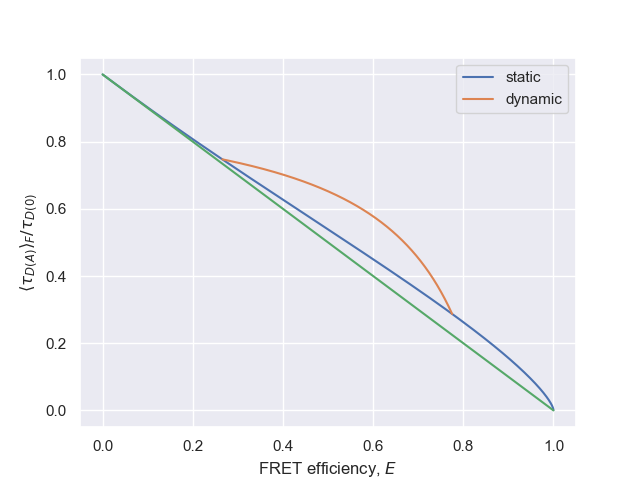

interactive(children=(IntSlider(value=60, description='R1', min=20, step=5), IntSlider(value=40, description='…

In [8]:
# Interactively
E_stat,tau_stat = static_FRET_line(model=dist.normal_distribution,param=(50,5),variable_parameter=0,param_range=(1,200))
E_dyn,tau_dyn = dynamic_FRET_line(model1=dist.normal_distribution,model2=dist.normal_distribution,param1=(40,5),param2=(60,5))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_stat, = ax.plot(E_stat,tau_stat)
line_dyn, = ax.plot(E_dyn,tau_dyn)            
ax.plot((0,1),(1,0))
plt.legend(('static','dynamic'))
plt.xlabel('FRET efficiency, $E$')
plt.ylabel('$\\left<\\tau_{D(A)}\\right>_F/\\tau_{D(0)}$')

def update(R1=60., R2=40., width=5.0):
    E_stat, tau_stat = static_FRET_line(model=dist.normal_distribution,param=(50,width),variable_parameter=0,param_range=(1,200))
    E_dyn, tau_dyn = dynamic_FRET_line(model1=dist.normal_distribution,model2=dist.normal_distribution,param1=(R1,width),param2=(R2,width))
    line_stat.set_xdata(E_stat)
    line_stat.set_ydata(tau_stat)
    line_dyn.set_xdata(E_dyn)
    line_dyn.set_ydata(tau_dyn)
    
    fig.canvas.draw()

interact(update, R1=(20,100,5), R2=(20,100,5), width=(1.,30.,1.));

The same can be investigated in the moment represenation:

<IPython.core.display.Javascript object>


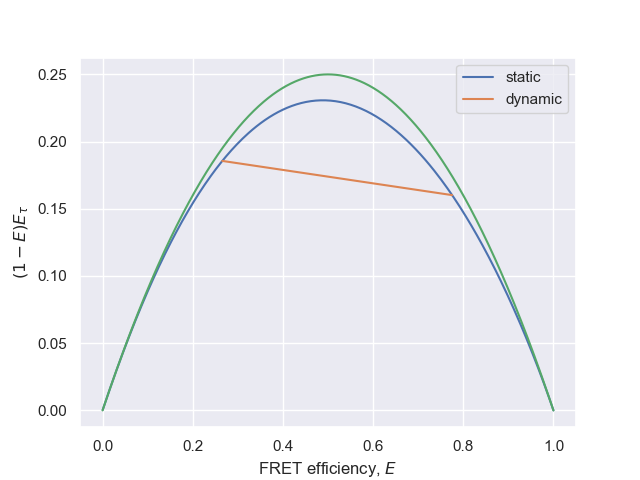

interactive(children=(IntSlider(value=60, description='R1', min=20, step=5), IntSlider(value=40, description='…

In [10]:
# Interactively
E_stat,tau_stat = static_FRET_line(model=dist.normal_distribution,param=(50,5),variable_parameter=0,param_range=(1,200),mode='moments')
E_dyn,tau_dyn = dynamic_FRET_line(model1=dist.normal_distribution,model2=dist.normal_distribution,param1=(40,5),param2=(60,5),mode='moments')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_stat, = ax.plot(E_stat,tau_stat)
line_dyn, = ax.plot(E_dyn,tau_dyn)
x = np.linspace(0,1,1000)
ax.plot(x,x*(1-x))
plt.legend(('static','dynamic'))
plt.xlabel('FRET efficiency, $E$')
plt.ylabel('$(1-E)E_{\\tau}$')

def update(R1=60., R2=40., width=5.0):
    E_stat, tau_stat = static_FRET_line(model=dist.normal_distribution,param=(50,width),variable_parameter=0,param_range=(1,200),mode='moments')
    E_dyn, tau_dyn = dynamic_FRET_line(model1=dist.normal_distribution,model2=dist.normal_distribution,param1=(R1,width),param2=(R2,width),mode='moments')
    line_stat.set_xdata(E_stat)
    line_stat.set_ydata(tau_stat)
    line_dyn.set_xdata(E_dyn)
    line_dyn.set_ydata(tau_dyn)
    
    fig.canvas.draw()

interact(update, R1=(20,100,5), R2=(20,100,5), width=(1.,30.,1.));